# Assignment: Data Wrangling
### `! git clone https://github.com/ds4e/wrangling`
### Do Q1 and Q2, and either Q3 or Q4, for a total of 3 questions.

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing?
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

1.

In [1]:
from google.colab import files
uploaded=files.upload()

import pandas as pd
df=pd.read_csv('airbnb_hw.csv')

Saving airbnb_hw.csv to airbnb_hw.csv


In [2]:
# To check for missing values in the Price variable
missing_values_price=df['Price'].isna().sum()
print(f'missing_values in Price column: {missing_values_price}')

missing_values in Price column: 0


There are 0 missing values in the Price column

In [3]:
# To ensure that all the datapoints are formatted uniformly
df['Price'] = df['Price'].replace({'\$': '', ',': ''}, regex=True)

When a price goes over 999 dollars, say from 675 to 1,112 there is a comma inserted that impacts how the software will interpret the value.

2.

In [4]:
from google.colab import files
uploaded=files.upload()

import pandas as pd
df2=pd.read_csv('mn_police_use_of_force.csv')


Saving mn_police_use_of_force.csv to mn_police_use_of_force.csv


In [5]:
# Count missing values in the 'subject_injury' column
missing_injury = df2['subject_injury'].isna().sum()

# Calculate the proportion of missing values
missing_injury_percentage = (missing_injury / len(df2)) * 100

# Display the proportion of missing values
print(f"Proportion of missing values in 'subject_injury': {missing_injury_percentage:.2f}%")



Proportion of missing values in 'subject_injury': 76.19%


Missing data is a concern.

In [6]:
# To change value point
df2['subject_injury'].fillna('No', inplace=True)

<ipython-input-6-e318d4e75d05>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['subject_injury'].fillna('No', inplace=True)


In [7]:
# Cross-Tabulating with Force
cross_tab = pd.crosstab(df2['subject_injury'], df2['force_type'])
print(cross_tab)


force_type      Baton  Bodily Force  Chemical Irritant  Firearm  \
subject_injury                                                    
No                  2          8144               1552        2   
Yes                 2          1286                 41        0   

force_type      Gun Point Display  Improvised Weapon  Less Lethal  \
subject_injury                                                      
No                             60                108           87   
Yes                            44                 40            0   

force_type      Less Lethal Projectile  Maximal Restraint Technique  \
subject_injury                                                        
No                                   1                          170   
Yes                                  2                            0   

force_type      Police K9 Bite  Taser  
subject_injury                         
No                          33   1135  
Yes                         44    172  


Injuries seem to occur less, however force is used often.

3.

In [8]:
url = 'http://www.vcsc.virginia.gov/pretrialdataproject/October%202017%20Cohort_Virginia%20Pretrial%20Data%20Project_Deidentified%20FINAL%20Update_10272021.csv'
df3 = pd.read_csv(url,low_memory=False)

In [9]:
df3.head(3)

,InternalStudyID,REQ_REC#,Defendant_Sex,Defendant_Race,Defendant_BirthYear,Defendant_Age,Defendant_AgeGroup,Defendant_AgeatCurrentArrest,Defendant_AttorneyTypeAtCaseClosure,Defendant_IndigencyStatus,...,NewFelonySexualAssaultArrest_OffDate,NewFelonySexualAssaultArrest_ArrestDate,NewFelonySexualAssaultArrest_DaysBetweenContactEventandOffDate,NewFelonySexualAssaultArrest_DaysBetweenOffDateandArrestDate,NewFelonySexualAssaultArrest_DaysBetweenReleaseDateandOffDate,NewFelonySexualAssaultArrest_Disposition,Intertnalindicator_ReasonforExcludingFromFollowUpAnalysis,CriminalHistoryRecordsReturnedorCMSRecordsFoundforIndividual,DispRecordFoundforChargesinOct2017Contact_Atleast1dispfound,CrimeCommission2021ReportClassificationofDefendants
0,ADI00001,1,M,W,1986,31,3,31,99,99,...,,,,999,999,,4,1,0,Defendant could not be classified or tracked d...
1,ADI00007,3,M,B,1956,60,6,60,9,9,...,,,,999,999,,5,1,1,Defendant Detained Entire Pre-Trial Period_Und...
2,ADI00008,4,M,W,1990,27,3,27,9,9,...,,,,999,999,,5,1,1,Defendant Detained Entire Pre-Trial Period_Und...


In [10]:
import numpy as np
# Replacing Data

df3['WhetherDefendantWasReleasedPretrial'].replace(['', 'None', None], np.nan, inplace=True)

<ipython-input-10-24cf49a85071>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df3['WhetherDefendantWasReleasedPretrial'].replace(['', 'None', None], np.nan, inplace=True)


4.

In [11]:
from google.colab import files
import pandas as pd

uploaded = files.upload()
justice_data = list(uploaded.keys())[0]
df4=pd.read_parquet(justice_data, engine='pyarrow')







Saving justice_data.parquet to justice_data.parquet


In [12]:
print(df4['ImposedSentenceAllChargeInContactEvent'])
missing_values_imposedsentence=df4['ImposedSentenceAllChargeInContactEvent'].isna().sum()
print(f'missing_values in ImposedSentenceAllChargeInContactEvent column: {missing_values_imposedsentence}')
unique=df4['ImposedSentenceAllChargeInContactEvent'].unique()
print(f'Unique Values in Column: {unique}')

0                        
1                      60
2                      12
3        .985626283367556
4                        
               ...       
22981                    
22982                    
22983                    
22984                    
22985                    
Name: ImposedSentenceAllChargeInContactEvent, Length: 22986, dtype: object
missing_values in ImposedSentenceAllChargeInContactEvent column: 0
Unique Values in Column: [' ' '60' '12' '.985626283367556' '36' '6' '24' '5.91375770020534' '120'
 '72' '11.9917864476386' '0' '2.95687885010267' '84' '108' '300' '240'
 '180' '4' '96' '2' '54' '.328542094455852' '44' '5' '115' '132' '48'
 '258' '34' '76' '.164271047227926' '.131416837782341' '111' '9' '3'
 '1.97125256673511' '36.9856262833676' '.0657084188911704'
 '35.4928131416838' '106.492813141684' '8' '35' '18.3141683778234' '480'
 '32' '93' '234' '732' '1.16427104722793' '4.6570841889117' '21' '7'
 '4.49281314168378' '18' '600' '43.1642710472279' '179' '52' '3

In [13]:
cleaning = df4['ImposedSentenceAllChargeInContactEvent'].astype(str).apply(lambda x: f"{float(x):.2f}" if x.replace('.', '', 1).isdigit() else x)
cleaning.head()

,ImposedSentenceAllChargeInContactEvent
0,
1,60.00
2,12.00
3,0.99
4,


**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work.
2. Drop any columns that do not contain data.
3. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
4. Clean the Age variable and make a histogram of the ages of the victims.
5. What proportion of victims are male?
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?
9. What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)

In [14]:
uploaded=files.upload()

Saving GSAF5.xls to GSAF5.xls


In [15]:
shark_attack_data=pd.read_excel('/content/GSAF5.xls')


In [16]:
# Drop columns not containing Data

df_clean=shark_attack_data
df_clean=df_clean.dropna(axis=1, how='all')
print(df_clean)

                     Date    Year        Type             Country  \
0     2025-01-23 00:00:00  2025.0  Unprovoked           Australia   
1     2025-01-22 00:00:00  2025.0  Unprovoked           Australia   
2     2025-01-11 00:00:00  2025.0    Provoked                 USA   
3     2025-01-02 00:00:00  2025.0  Unprovoked       New Caledonia   
4     2025-01-02 00:00:00  2025.0  Unprovoked           Australia   
...                   ...     ...         ...                 ...   
6987          Before 1903     0.0  Unprovoked           AUSTRALIA   
6988          Before 1903     0.0  Unprovoked           AUSTRALIA   
6989            1900-1905     0.0  Unprovoked                 USA   
6990            1883-1889     0.0  Unprovoked              PANAMA   
6991            1845-1853     0.0  Unprovoked  CEYLON (SRI LANKA)   

                  State                                 Location  \
0     Western Australia                           Shipwreck Cove   
1     Western Australia            

In [17]:
df_clean['Year'] = pd.to_numeric(df_clean['Year'], errors='coerce')
df_clean = df_clean.dropna(subset=['Year'])

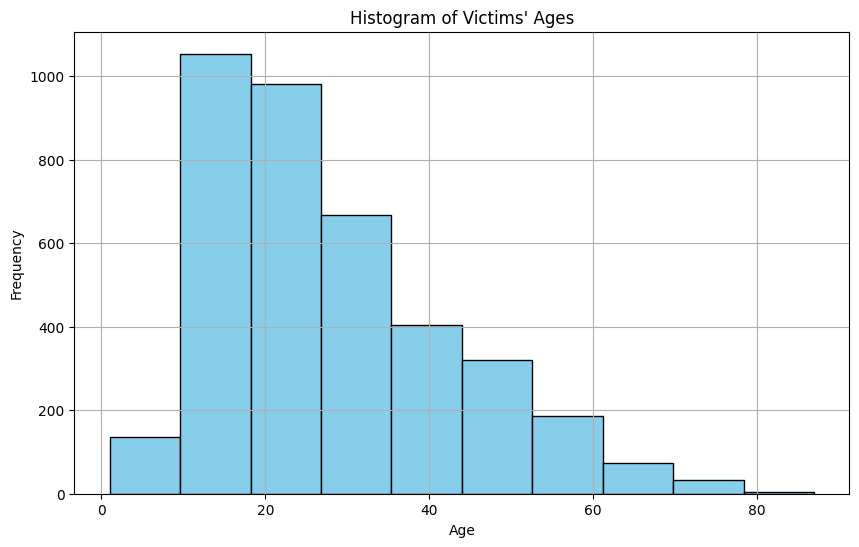

In [22]:
df_clean= df_clean.dropna(subset=['Age'])
df_clean['Age'] = pd.to_numeric(df_clean['Age'], errors='coerce')

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(df_clean['Age'], bins=10, edgecolor='black', color='skyblue')
plt.title('Histogram of Victims\' Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [26]:
male_victims = df_clean[df_clean['Sex'] == 'M'].shape[0]
total_victims = df_clean.shape[0]

proportion_male = male_victims / total_victims

print(f"Proportion of male victims: {proportion_male:.2f}")




Proportion of male victims: 0.84


In [29]:
df_clean['Type'] = df_clean['Type'].str.strip().str.lower()
df_clean['Type'] = df_clean['Type'].replace({
    'provoked': 'Provoked',
    'unprovoked': 'Unprovoked',
    'unknown': 'Unknown'
})

proportion_unprovoked = (df_clean['Type'] == 'Unprovoked').mean()

print(f"Proportion of unprovoked attacks: {proportion_unprovoked:.2f}")



Proportion of unprovoked attacks: 0.83


In [30]:
df_clean['Fatal Y/N'] = df_clean['Fatal Y/N'].str.strip().str.lower()

df_clean['Fatal Y/N'] = df_clean['Fatal Y/N'].replace({
    'y': 'Y',
    'yes': 'Y',
    'n': 'N',
    'no': 'N',
    'unknown': 'Unknown'
})

df_clean['Fatal Y/N'] = df_clean['Fatal Y/N'].apply(lambda x: x if x in ['Y', 'N', 'Unknown'] else 'Unknown')

In [32]:
unprovoked_by_gender = df_clean[df_clean['Type'] == 'Unprovoked'].groupby('Sex').size()
total_by_gender = df_clean.groupby('Sex').size()

proportion_unprovoked_by_gender = unprovoked_by_gender / total_by_gender
print(proportion_unprovoked_by_gender)

Sex
 M     1.000000
F      0.870337
M      0.827047
M      1.000000
lli    1.000000
dtype: float64


Women

In [33]:
fatal_by_type = df_clean[df_clean['Fatal Y/N'] == 'Y'].groupby('Type').size()
total_by_type = df_clean.groupby('Type').size()

proportion_fatal_by_type = fatal_by_type / total_by_type
print(proportion_fatal_by_type)

Type
?                           NaN
Provoked               0.029316
Unprovoked             0.194894
invalid                0.021834
questionable           0.266667
sea disaster           0.487805
under investigation         NaN
watercraft             0.045455
dtype: float64


Unprovoked

In [35]:
fatal_by_gender = df_clean[df_clean['Fatal Y/N'] == 'Y'].groupby('Sex').size()
total_by_gender = df_clean.groupby('Sex').size()

proportion_fatal_by_gender = fatal_by_gender / total_by_gender
print(proportion_fatal_by_gender)

Sex
 M         NaN
F      0.14032
M      0.17786
M          NaN
lli        NaN
dtype: float64


More likely to be fatal if against a male.

In [39]:
df_clean['Is_White_Shark'] = df_clean['Species '].astype(str).str.split().apply(lambda x: 'White' in x and 'Shark' in x if isinstance(x, list) else False)

proportion_white_sharks = df_clean['Is_White_Shark'].mean()

print(f"Proportion of attacks by White Sharks: {proportion_white_sharks:.2f}")

Proportion of attacks by White Sharks: 0.00


**Q3.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?
  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?

**Q4.** Many important datasets contain a race variable, typically limited to a handful of values often including Black, White, Asian, Latino, and Indigenous. This question looks at data gathering efforts on this variable by the U.S. Federal government.

1. How did the most recent US Census gather data on race?
2. Why do we gather these data? What role do these kinds of data play in politics and society? Why does data quality matter?
3. Please provide a constructive criticism of how the Census was conducted: What was done well? What do you think was missing? How should future large scale surveys be adjusted to best reflect the diversity of the population? Could some of the Census' good practices be adopted more widely to gather richer and more useful data?
4. How did the Census gather data on sex and gender? Please provide a similar constructive criticism of their practices.
5. When it comes to cleaning data, what concerns do you have about protected characteristics like sex, gender, sexual identity, or race? What challenges can you imagine arising when there are missing values? What good or bad practices might people adopt, and why?
6. Suppose someone invented an algorithm to impute values for protected characteristics like race, gender, sex, or sexuality. What kinds of concerns would you have?

1. The most recent US Census gathered data on race by allowing individuals to self-identify under the categories of White, Black or African American, American Indian or Alaska Native, Asian, Native Hawaiian or Pacific Islander. Individuals were also able to select multiple races if applicable.

2. This data is important to collect to maintain relevant policies in the US, especially in relation to civil rights. This information is meant to guide policies and help governmental officials. This data quality is crucial, for without it policies may not be as positively influenced as they could be.

3. I think the self identification is a positive approach that allows for people to select whichever race they feel most aligned with. The "other" category may get a bit open-ended/non-objective when trying to conduct social scientific research. I think prefer not to say should always be an option. The diversity of a population may be respected in large populous research by making conscious decisions of the areas being sampled and diversifying gender.

4. Data on gender and sex is also self identifiable. However it tends to be binary asking "male" or "female" without acknowledgement that sex and gender are different concepts. There should be two different categories.

5. Protected characteristics need not be reported which may wrongfully skew demographic information. I fear researchers may just take the data the data they are supplied to draw conclusions, however these specific variables should be collected by a majority of participants to allow demographic conclusions to be drawn.

6. I would fear gender biases based on international/national averages and a lack of acknowledgment for the spectrum that race, gender, and sexuality fall upon.